# Proyecto Módulo Data Analysis: Análisis Exploratorio de Datos sobre el Rendimiento Estudiantil
## Introducción

En este proyecto, realizaremos un análisis exploratorio de datos (EDA) utilizando el dataset "StudentsPerformance.csv", que contiene información sobre el rendimiento de estudiantes en exámenes. El objetivo es identificar factores que influyen en el desempeño académico, como el género, la preparación para el examen, el nivel educativo de los padres y otros aspectos demográficos. Este análisis busca resolver un problema real: entender cómo estos factores afectan el rendimiento para proponer posibles intervenciones que mejoren los resultados estudiantiles.

## Hipótesis iniciales:

    Los estudiantes que completan el curso de preparación para el examen tienen un mejor rendimiento que aquellos que no lo hacen.
    El nivel educativo de los padres tiene un impacto positivo en el desempeño de los estudiantes.
    Existen diferencias en el rendimiento según el género y la raza/etnia.

A continuación, se detalla el desarrollo del análisis, incluyendo limpieza de datos, exploración, visualizaciones y conclusiones.

## Fuentes de Datos

El dataset utilizado proviene del archivo "StudentsPerformance.csv", que incluye las siguientes columnas:

    gender: Género del estudiante (male/female).
    race/ethnicity: Grupo étnico (group A, B, C, D, E).
    parental level of education: Nivel educativo de los padres (e.g., high school, bachelor's degree, master's degree).
    lunch: Tipo de almuerzo (standard/free/reduced).
    test preparation course: Si el estudiante completó un curso de preparación (none/completed).
    math score: Puntuación en matemáticas.
    reading score: Puntuación en lectura.
    writing score: Puntuación en escritura.

El dataset contiene 1000 registros y está disponible en formato CSV.


## Step 1: Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Explanation:

    pandas for data manipulation.

    numpy for numerical operations.

    seaborn and matplotlib.pyplot for plotting.

## Step 2: Load and Display Dataset

In [3]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75



## Explanation:

    Loads the CSV into a DataFrame.

    df.head() shows the first 5 rows to get a quick idea of the data.

## Step 3: Basic Dataset Info

In [4]:
print("Dataset Shape:", df.shape)
df.info()


Dataset Shape: (1000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Step 4: Check for Missing Values

In [5]:
df.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Step 5: Statistical Summary

In [6]:
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Step 6: Rename Columns

In [7]:
df.columns = df.columns.str.replace(" ", "_")


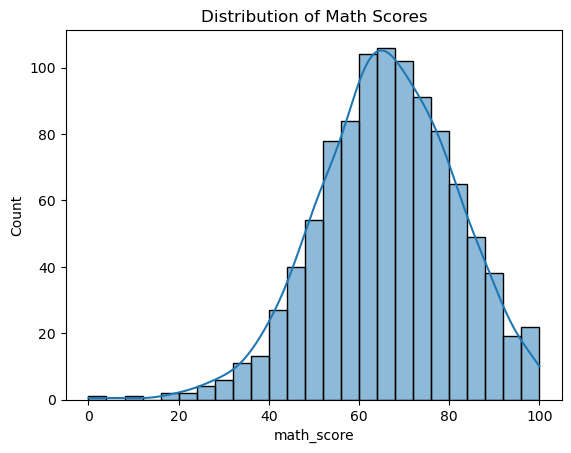

In [8]:
sns.histplot(df.math_score, kde=True)
plt.title("Distribution of Math Scores")
plt.show()


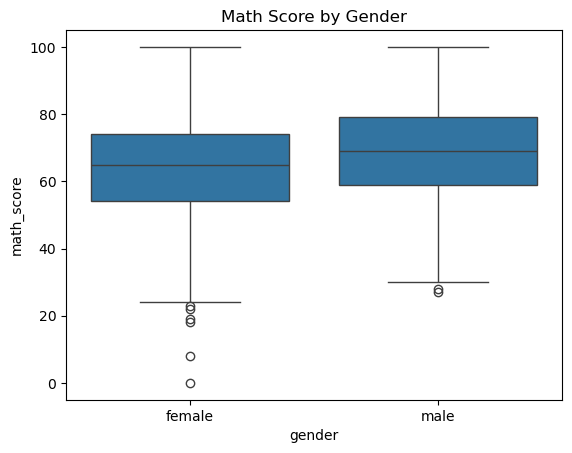

In [9]:
sns.boxplot(x='gender', y='math_score', data=df)
plt.title("Math Score by Gender")
plt.show()


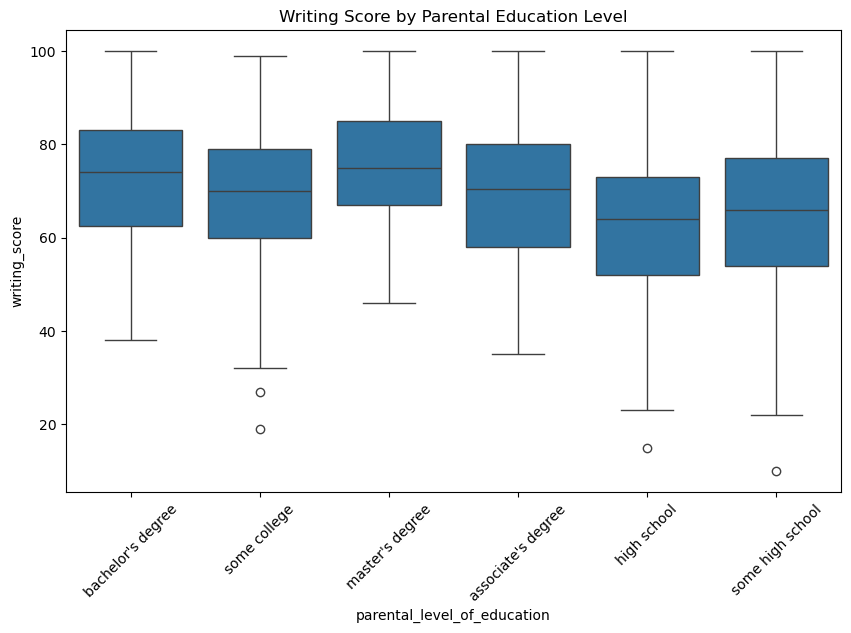

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='parental_level_of_education', y='writing_score', data=df)
plt.xticks(rotation=45)
plt.title("Writing Score by Parental Education Level")
plt.show()


## Step 8: Correlation Analysis

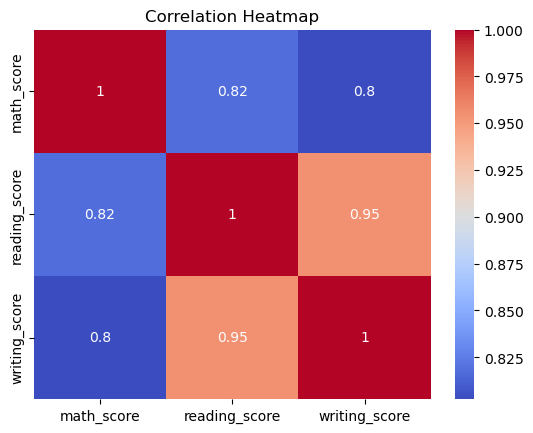

In [11]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## Step 9 Feature Engineering

In [12]:
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)


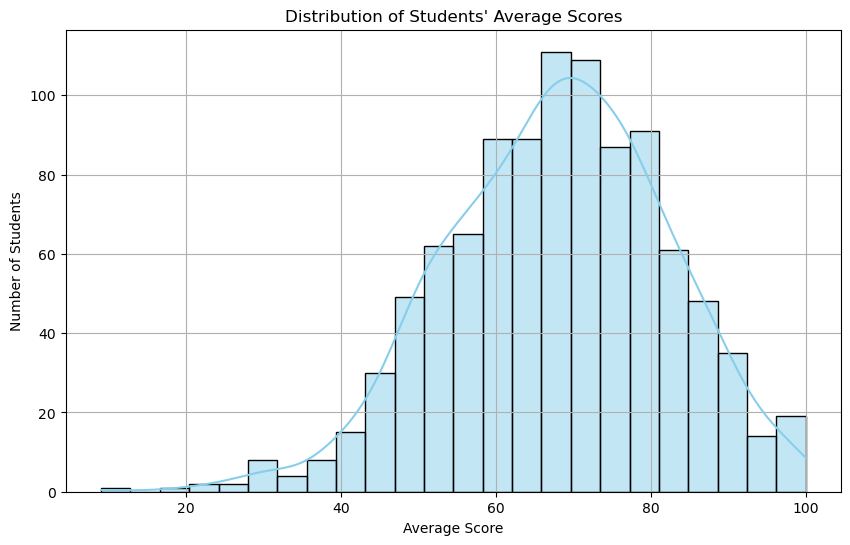

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df["average_score"], kde=True, color="skyblue")
plt.title("Distribution of Students' Average Scores")
plt.xlabel("Average Score")
plt.ylabel("Number of Students")
plt.grid(True)
plt.show()

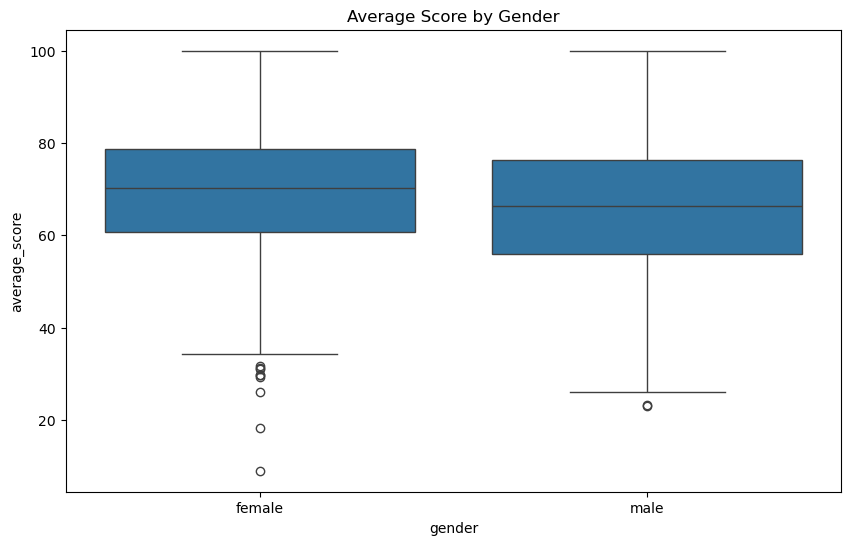

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="gender", y="average_score", data=df)
plt.title("Average Score by Gender")
plt.show()


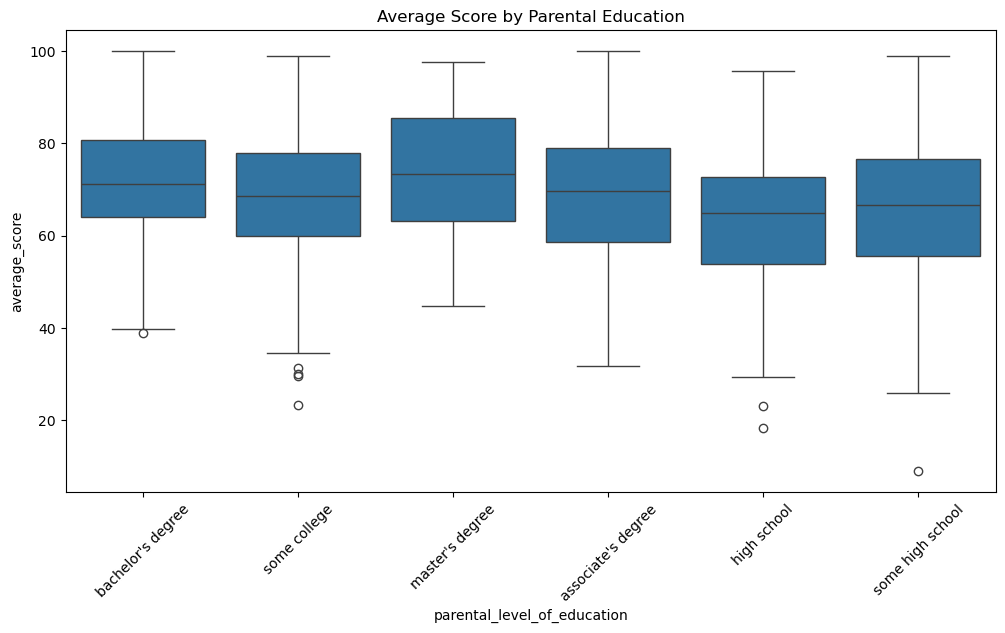

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="parental_level_of_education", y="average_score", data=df)
plt.xticks(rotation=45)
plt.title("Average Score by Parental Education")
plt.show()
